# Convection at 10 µL/min

This script is to assess the effect of convection to the gel at 10 µL/min. The convected volume is measured by looking at the top surface of the gel at 1 hour interval.

In [11]:
import numpy as np

import os
from natsort import natsorted, ns

from skimage import io
from skimage.util import img_as_float
from skimage.restoration import denoise_wavelet, estimate_sigma

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from ipywidgets import interactive
import ipywidgets as widgets

In [4]:
# Name of the case
case = '2022-09-06 10 uLpmin'

# Reference time (min)
t0 = 30

# Duration (min)
dt = 60

In [7]:
# List images
list_files = natsorted(os.listdir(f"../{case}/images"))

# Load ref
im0 = img_as_float(io.imread(f"../{case}/images/{list_files[t0]}"))

# Load after
im1 = img_as_float(io.imread(f"../{case}/images/{list_files[t0+dt]}"))

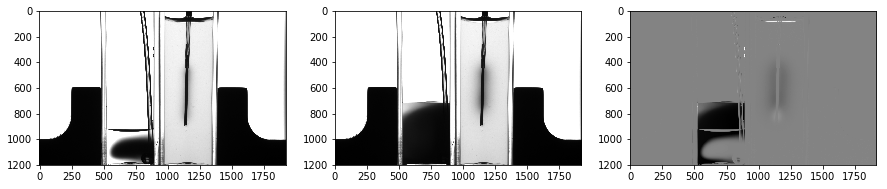

In [9]:
plt.rcParams["figure.figsize"] = (15,10)
figure, ax = plt.subplots(ncols=3)
        
ax[0].imshow(im0, cmap='gray')

ax[1].imshow(im1, cmap='gray')

ax[2].imshow(im1-im0, cmap='gray')

plt.show()

## Level rise assessment

We use the widget below to assess the level rise by measuring the height of the white pixels area.

In [12]:
def crop(horizontal,vertical):
    im = im1[vertical[0]:vertical[1],horizontal[0]:horizontal[1]] - im0[vertical[0]:vertical[1],horizontal[0]:horizontal[1]]
    
    rect = patches.Rectangle([horizontal[0], vertical[0]], horizontal[1]-horizontal[0], vertical[1]-vertical[0], linewidth=1, edgecolor='r', facecolor='none')
    
    plt.rcParams["figure.figsize"] = (15,10)
    figure, ax = plt.subplots(ncols=2)
        
    ax[0].imshow(im1-im0, cmap='gray')
    ax[0].add_patch(rect)
    ax[0].set_title('Original image')

    ax[1].imshow(im, cmap='gray')
    ax[1].set_title('Cropped image')
    plt.show()
    
    return im

y_max, x_max = im0.shape
w = interactive(crop, horizontal=widgets.IntRangeSlider(min=0,max=x_max, continuous_update=False),
                       vertical=widgets.IntRangeSlider(min=0,max=y_max, continuous_update=False))
w

interactive(children=(IntRangeSlider(value=(480, 1440), continuous_update=False, description='horizontal', max…

In [15]:
# Level rise in pixels (as seen in previous cell)
h = 4

# Pixel per cm
pxpcm = 367

# Volume (mL)
V = 1.*h/367

# Concentration (µg/mL)
c0 = 200

# Mass transfer by convection (µg/min)
Phi_conv = c0*V/dt

print(f'Mass transfer by convection: {Phi_conv} µg/min')

Mass transfer by convection: 0.036330608537693 µg/mi
